In [27]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [28]:
# Load dataset
data = load_breast_cancer()

# Get features and target
X=data.data
y=data.target

In [29]:
# Get dummy variable 
y = pd.get_dummies(y).values

y[:3]

array([[1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [30]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [31]:
# Initialize variables
learning_rate = 0.1
iterations = 1000
N = y_train.size

# number of input features
input_size = 30

# number of hidden layers neurons
hidden_size = 2 

# number of neurons at the output layer
output_size = 2

results = pd.DataFrame(columns=["mse", "accuracy"])

In [32]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [33]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [34]:
for itr in range(iterations):    
    
    # feedforward propagation
    # one hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # one output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

C:\Users\amitn\AppData\Local\Temp\ipykernel_4920\4242647434.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\amitn\AppData\Local\Temp\ipykernel_4920\4242647434.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\amitn\AppData\Local\Temp\ipykernel_4920\4242647434.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\amitn\AppData\Local\Temp\ipykernel_4920\4242647434.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

<AxesSubplot:title={'center':'Mean Squared Error'}>

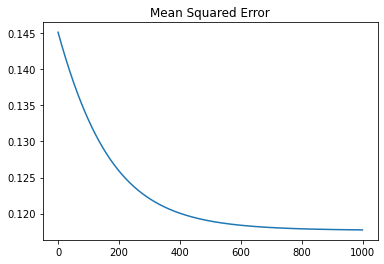

In [35]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

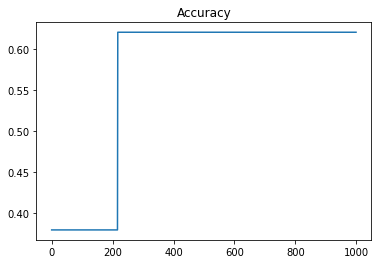

In [36]:
results.accuracy.plot(title="Accuracy")

In [37]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8
